### SSH data from redmar-CICESE stations 2016

http://redmar.cicese.mx

From a previous inspection, the only stations that have data are:

|Code|Station|Lat|Lon|
|:--:|:--:|:--:|:-:|
|ENSM|Ensenada| 31°50.894'N | 116°37.067'W|
|SNQN|San Quintín|30°29'4.23"N | 115°58'38.95"W|

These stations have intermitent data:

|Code|Station|Lat|Lon|
|:--:|:--:|:--:|:-:|
|ICDN|Isla de Cedros|28°5.760'N|115°10.992'W|
|GROM|Guerrero Negro|27° 53' N |114° 09' W|

Locations:

<div>
<img src="figures/estaciones_redmar.png" width="500"/>
</div>



### Metadata

Centro de Investigacion Cientifica y de Educacion Superior de Ensenada
   
                  Laboaratorio del Nivel del Mar
                    Red Mareografica de CICESE
   
                       FORMATO DE DATOS
        Estaciones Mareograficas Meteorologicas Costeras (EMMC)
   
                       Zona de tiempo: GMT

|Col|  Variable          |       Unidades | Equipo|
|:--:|:--:|:--:|:--:|
|1  |  Anio   |                   -||
|2  |  Mes    |                  -||
|3  |  Dia    |                  -||
|4  |  Hora   |                  -||
|5  |  Minuto |                  -||
|6  |  Segundo |                 -||
|7  |  ID Estacion |             -||
|8  |  Voltaje sistema   |       V |         datalogger+sensores+radios|
|9  |  Nivel del mar |           m  |        sensor de presion sumergido Leveltrol 700|
|10 |  Nivel del mar |           m  |        sensor de presion burbujeador OTT-CBS|
|11 |  Switch1   |               -  |        switch de flotador superior|
|12 |  Switch2   |               -  |        switch de flotador inferior|
|13 |  Temperatura Agua  |       grados(C)|  sensor de temperatura 109SS-L|
|14 |  Nivel del mar   |         m        |  radar OTT-RSL|
|15 |  Radiacion Solar |         W/m^2    |  piranometro SP-212 ( no funcionando actualmente)|
|16 |  Direccion Viento |        Azimut   |  Vaisala WXT520|
|17 |  Magnitud Viento |         m/s      |  Vaisala WXT520|
|18 |  Temperatura Aire |        grados(C)|  Vaisala WXT520|
|19 |  Humedad Relativa  |       %        | Vaisala WXT520|
|20 |  Presion Atmosferica |     mb      |   Vaisala WXT520|
|21 |  Precipitacion  |          mm      |   Vaisala WXT520|
|22 |  Voltaje estac. meteor. |  V       |   Vaisala WXT520|
|23 |  Nivel del Mar       |     m       |   radar Sutron R|

Nota: Texto escrito sin acentos

In [54]:
from __future__ import division
import pycwt as wavelet
from pycwt.helpers import find


import cmocean as cmo
import datetime as dt
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ssh_tools as ssht # my module
import tide_tools as tidet
from scipy import signal
import warnings
warnings.filterwarnings('ignore')



In [5]:
col_names = ['year','month', 'day', 'hour','minute','second','ID',
                'voltage','ssh_leveltrol','ssh_burbujeador',
                'switch1','switch2', 'water_temp','ssh_radar',
                'solar_radiation','wind_dir','wind_speed',
                'air_temp','rel_humidity','atm_pressure', 'precipitation', 
                'voltage_station', 'ssh_radar_sutron']

In [9]:
station = 'ENSM'
df_ensm = pd.DataFrame(columns = col_names)
directory = '../REDMAR/'+station+'/2016/'

for file in sorted([fname for fname in os.listdir(directory) if fname.endswith('.dat')]):
    filename = directory+file
    df_new = ssht.get_redmar_dataframe(filename)  
    df_ensm = df_ensm.append(df_new)
    continue 

In [40]:
station = 'SNQN'
df_snqn = pd.DataFrame(columns = col_names)
directory = '../REDMAR/'+station+'/2016/'

for file in sorted([fname for fname in os.listdir(directory) if fname.endswith('.dat')]):
    filename = directory+file
    df_new = ssht.get_redmar_dataframe(filename)  
    df_snqn = df_snqn.append(df_new)
    continue 

In [41]:
station = 'ICDN'
df_icdn = pd.DataFrame(columns = col_names)
directory = '../REDMAR/'+station+'/2016/'

for file in sorted([fname for fname in os.listdir(directory) if fname.endswith('.dat')]):
    filename = directory+file
    df_new = ssht.get_redmar_dataframe(filename)  
    df_icdn = df_icdn.append(df_new)
    continue 

In [42]:
station = 'GROM'
df_grom = pd.DataFrame(columns = col_names)
directory = '../REDMAR/'+station+'/2016/'

for file in sorted([fname for fname in os.listdir(directory) if fname.endswith('.dat')]):
    filename = directory+file
    df_new = ssht.get_redmar_dataframe(filename)  
    df_grom = df_grom.append(df_new)
    continue 

Text(0.5, 1.0, 'GROM 2016')

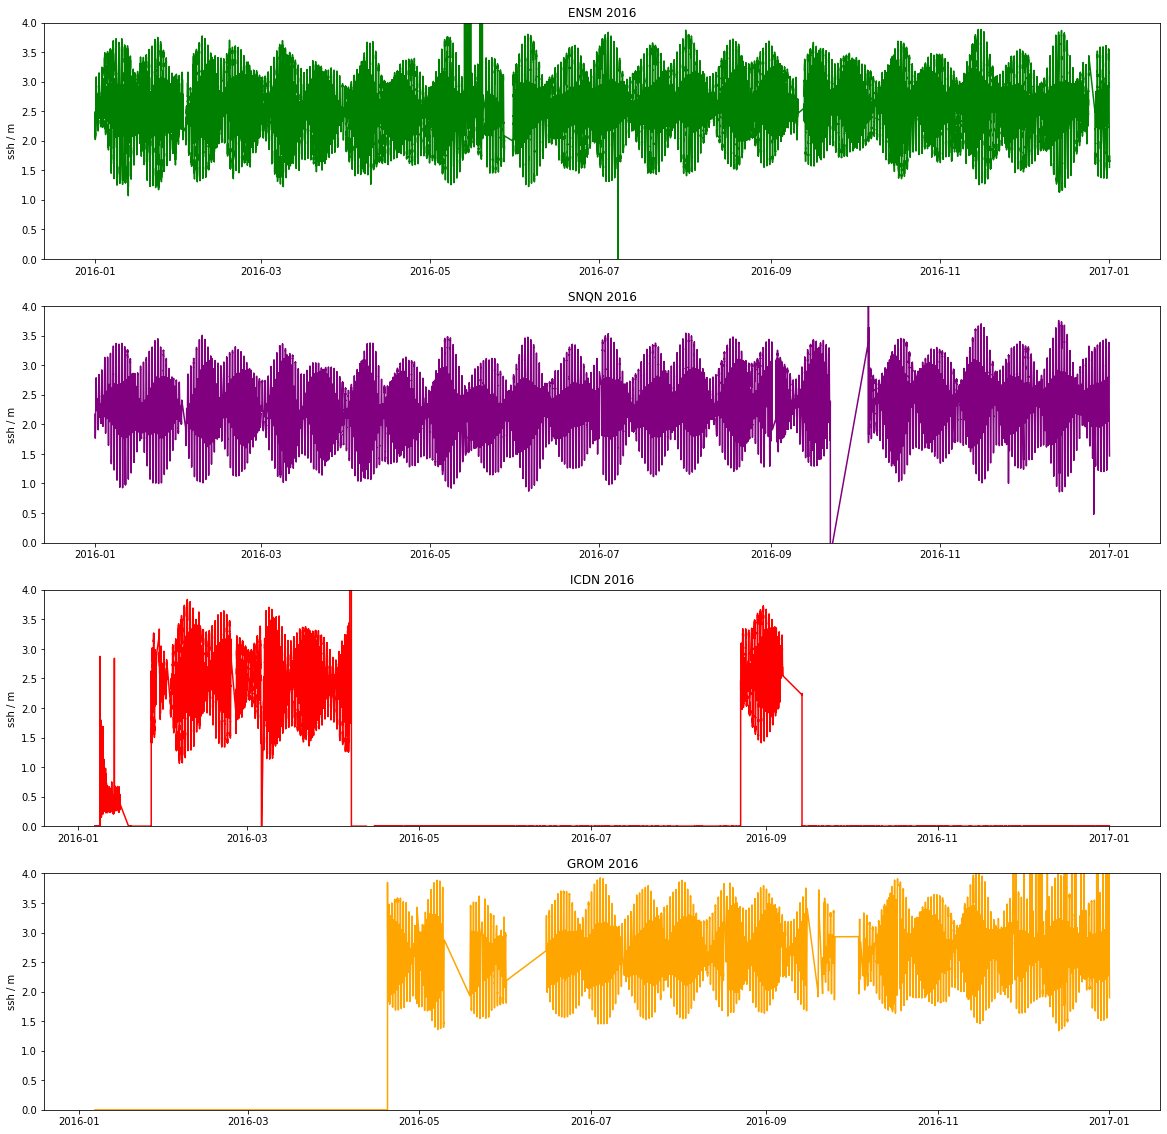

In [43]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,20), sharey=True)
axs = [ax1,ax2,ax3,ax4]

ax1.plot(df_ensm.index, df_ensm['ssh_burbujeador'], color='g')
ax2.plot(df_snqn.index, df_snqn['ssh_burbujeador'], color='purple')
ax3.plot(df_icdn.index, df_icdn['ssh_burbujeador'], color='red')
ax4.plot(df_grom.index, df_grom['ssh_burbujeador'], color='orange')
      
for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('ssh / m')
    ax.set_ylim(0,4)
ax1.set_title('ENSM 2016')
ax2.set_title('SNQN 2016')
ax3.set_title('ICDN 2016')
ax4.set_title('GROM 2016')

### Remove tides

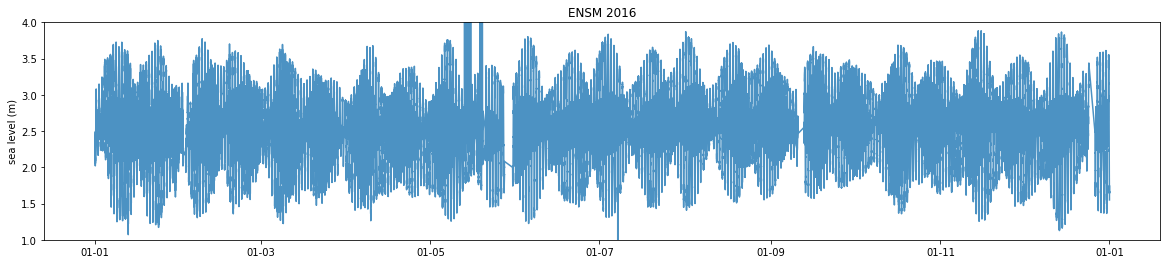

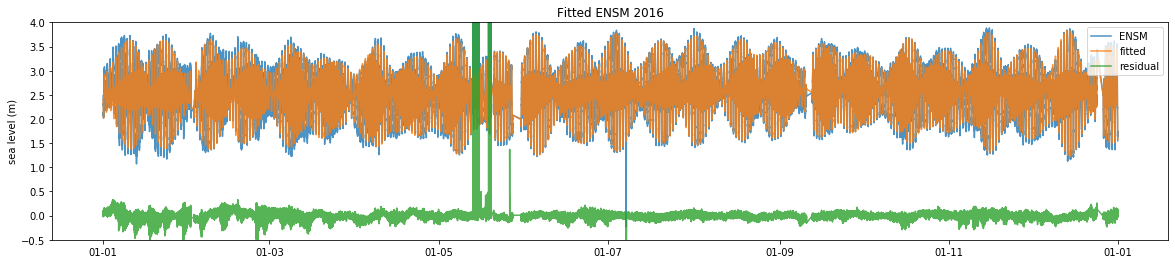

In [50]:
omegas = tidet.define_constituents()
station='ENSM'
ssh_ensm = df_ensm['ssh_burbujeador'][:]

# plot
fig,ax = plt.subplots(1,1, figsize=(20,4))
ax.plot(ssh_ensm, alpha=0.8, label=station)
ax.set_ylabel('sea level (m)') 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.set_title('%s 2016' %(station))
ax.set_ylim(1,4)
 
# Time vector of seconds (generate timedelta vector and convert to seconds)
T_ensm = (ssh_ensm.index.values[1:]-ssh_ensm.index.values[1])/ np.timedelta64(1, 's')
T_ensm[0] = 1

A, level_ensm = tidet.fit_harmonics(omegas, T_ensm, ssh_ensm[1:])

# Plot
fig,ax = plt.subplots(1,1, figsize=(20,4))
ax.plot(ssh_ensm.index, ssh_ensm, alpha=0.8, label=station)
ax.plot(ssh_ensm.index[1:], np.squeeze(level_ensm), alpha=0.8, label='fitted')
ax.plot(ssh_ensm.index[1:], ssh_ensm[1:]-np.squeeze(level_ensm), alpha=0.8, label='residual')
ax.set_ylabel('sea level (m)') 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.set_title('Fitted %s 2016' %(station))
ax.set_ylim(-0.5,4)
ax.legend()

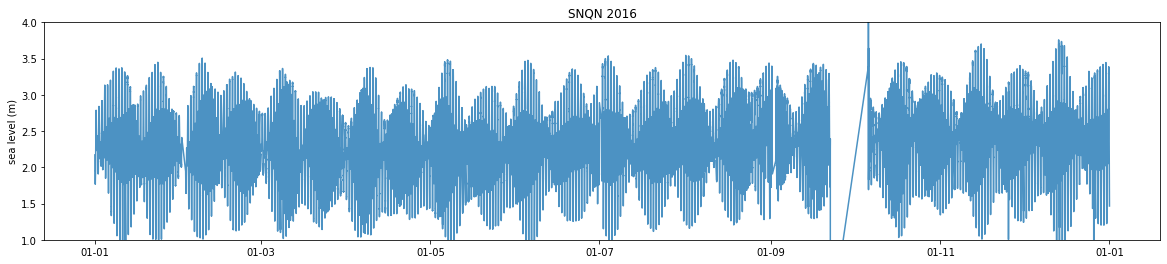

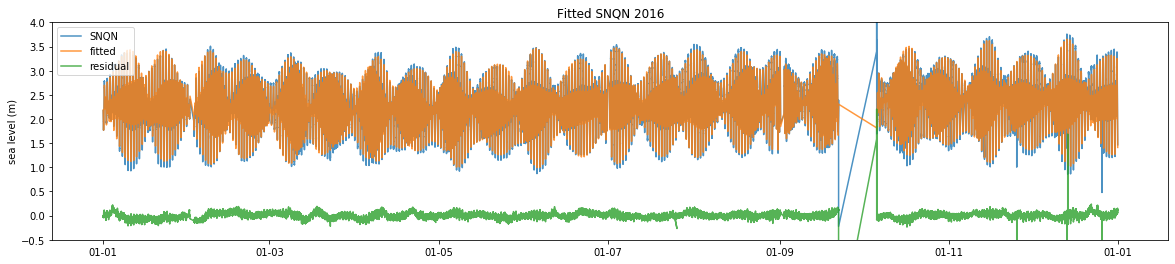

In [51]:
omegas = tidet.define_constituents()
station='SNQN'
ssh_snqn = df_snqn['ssh_burbujeador'][:]

# plot
fig,ax = plt.subplots(1,1, figsize=(20,4))
ax.plot(ssh_snqn, alpha=0.8, label=station)
ax.set_ylabel('sea level (m)') 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.set_title('%s 2016' %(station))
ax.set_ylim(1,4)
 
# Time vector of seconds (generate timedelta vector and convert to seconds)
T_snqn = (ssh_snqn.index.values[1:]-ssh_snqn.index.values[1])/ np.timedelta64(1, 's')
T_snqn[0] = 1

A, level_snqn = tidet.fit_harmonics(omegas, T_snqn, ssh_snqn[1:])

# Plot
fig,ax = plt.subplots(1,1, figsize=(20,4))
ax.plot(ssh_snqn.index, ssh_snqn, alpha=0.8, label=station)
ax.plot(ssh_snqn.index[1:], np.squeeze(level_snqn), alpha=0.8, label='fitted')
ax.plot(ssh_snqn.index[1:], ssh_snqn[1:]-np.squeeze(level_snqn), alpha=0.8, label='residual')
ax.set_ylabel('sea level (m)') 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.set_title('Fitted %s 2016' %(station))
ax.set_ylim(-0.5,4)
ax.legend()

### Wavelet transform

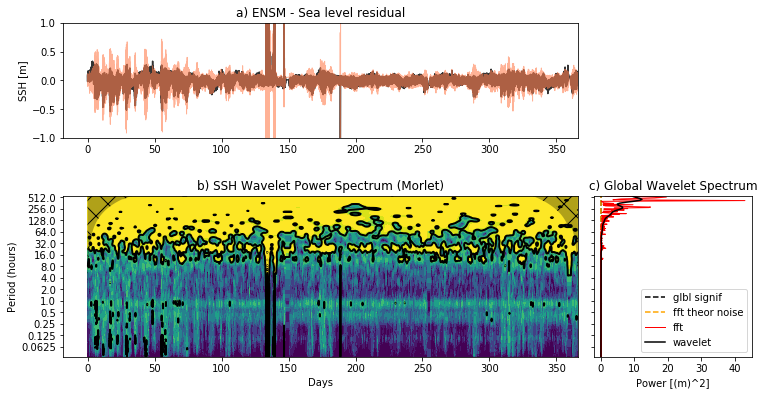

In [58]:
station = 'ENSM'
title = '%s - Sea level residual' %(station)
label = 'SSH'
units = 'm'

t_ensm = (1/3600)*(T_ensm.copy())
dt = (1/3600)*60
dat_ensm = ssh_ensm.values[1:]-np.squeeze(level_ensm)
dat_notrend_ensm = dat_ensm - np.nanmean(dat_ensm)
std_ensm = np.std(dat_notrend_ensm)
var_ensm = std_ensm**2
dat_norm_ensm = dat_notrend_ensm / std_ensm # Normalized dataset
N = len(dat_norm_ensm)

mother = wavelet.Morlet(6) 
s0 = 2 * dt  # Starting scale, in this case 2 * 0.01 hr = 2 min
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 14 / dj  # 14 powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat_ensm)  # Lag-1 autocorrelation for red noise

wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm_ensm, dt, dj, s0, J, mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std_ensm

power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = 1 / freqs

signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = np.ones([1, N]) * signif[:, None]
sig95 = power / sig95

glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var_ensm, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

## PLOT
# Prepare the figure
plt.close('all')
plt.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = plt.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = plt.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t_ensm/(24), dat_notrend_ensm, 'k', linewidth=1.5, alpha=0.8)
ax.plot(t_ensm/(24), iwave, '-', linewidth=1, color='coral', alpha=0.6)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))
ax.set_ylim(-1,1)

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = plt.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t_ensm/(24), np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
extent = [t_ensm.min(), t_ensm.max(), 0, max(period)]
bx.contour(t_ensm/(24), np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(np.concatenate([t_ensm/(24), t_ensm[-1:]/(24) + dt/(24), t_ensm[-1:]/(24) + dt/(24),
                           t_ensm[:1]/(24) - dt/(24), t_ensm[:1]/(24) - dt/(24)]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (hours)')
#
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)
bx.set_xlabel('Days')

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = plt.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, np.log2(period), 'k--', label='glbl signif')
cx.plot(var_ensm * fft_theor, np.log2(period), '--', color='orange',label='fft theor noise')
cx.plot(var_ensm * fft_power, np.log2(1./fftfreqs), '-', color='red', label='fft',
        linewidth=1.)
cx.plot(var_ensm * glbl_power, np.log2(period), 'k-', linewidth=1.5, label = 'wavelet')
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
#cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(np.log2([period.min(), period.max()]))
cx.set_yticks(np.log2(Yticks))
cx.set_yticklabels(Yticks)
cx.legend()
plt.setp(cx.get_yticklabels(), visible=False)

plt.show()

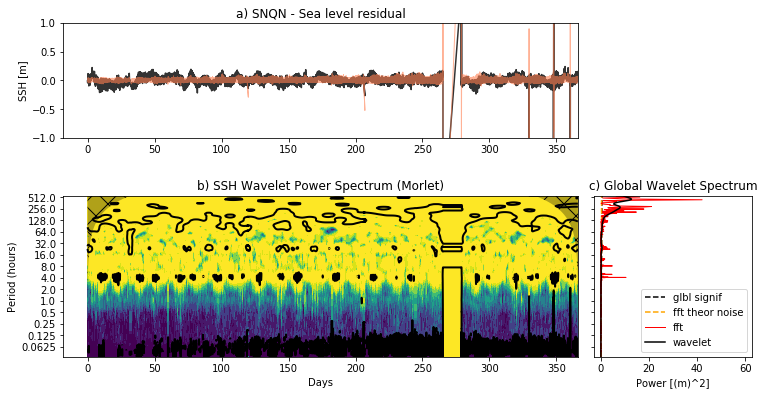

In [59]:
station = 'SNQN'
title = '%s - Sea level residual' %(station)
label = 'SSH'
units = 'm'

t_snqn = (1/3600)*(T_snqn.copy())
dt = (1/3600)*60
dat_snqn = ssh_snqn.values[1:]-np.squeeze(level_snqn)
dat_notrend_snqn = dat_snqn - np.nanmean(dat_snqn)
std_snqn = np.std(dat_notrend_snqn)
var_snqn = std_snqn**2
dat_norm_snqn = dat_notrend_snqn / std_snqn # Normalized dataset
N = len(dat_norm_snqn)

mother = wavelet.Morlet(6) 
s0 = 2 * dt  # Starting scale, in this case 2 * 0.01 hr = 2 min
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 14 / dj  # 14 powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat_snqn)  # Lag-1 autocorrelation for red noise

wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm_snqn, dt, dj, s0, J, mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std_snqn

power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = 1 / freqs

signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = np.ones([1, N]) * signif[:, None]
sig95 = power / sig95

glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var_snqn, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

## PLOT
# Prepare the figure
plt.close('all')
plt.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = plt.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = plt.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t_snqn/(24), dat_notrend_snqn, 'k', linewidth=1.5, alpha=0.8)
ax.plot(t_snqn/(24), iwave, '-', linewidth=1, color='coral', alpha=0.6)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))
ax.set_ylim(-1,1)

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = plt.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t_snqn/(24), np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
extent = [t_snqn.min(), t_snqn.max(), 0, max(period)]
bx.contour(t_snqn/(24), np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(np.concatenate([t_snqn/(24), t_snqn[-1:]/(24) + dt/(24), t_snqn[-1:]/(24) + dt/(24),
                           t_snqn[:1]/(24) - dt/(24), t_snqn[:1]/(24) - dt/(24)]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (hours)')
#
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)
bx.set_xlabel('Days')

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = plt.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, np.log2(period), 'k--', label='glbl signif')
cx.plot(var_snqn * fft_theor, np.log2(period), '--', color='orange',label='fft theor noise')
cx.plot(var_snqn * fft_power, np.log2(1./fftfreqs), '-', color='red', label='fft',
        linewidth=1.)
cx.plot(var_snqn * glbl_power, np.log2(period), 'k-', linewidth=1.5, label = 'wavelet')
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
#cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(np.log2([period.min(), period.max()]))
cx.set_yticks(np.log2(Yticks))
cx.set_yticklabels(Yticks)
cx.legend()
plt.setp(cx.get_yticklabels(), visible=False)

plt.show()